In [5]:
import pandas as pd
import numpy as np

In [6]:
missing_values = ['n/a', 'na']
df_train = pd.read_csv('titanic/train.csv', na_values = missing_values)
df_test = pd.read_csv('titanic/test.csv')

# Leemos los datos

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
hist = df_train.hist(bins=20)

In [10]:
def wrong_info(data_frame):
    
    # count
    length_df = len(data_frame)
    rows_without_nan = data_frame.count()
    print(f'data frame length: {length_df}. Null rows = {length_df-rows_without_nan}')

wrong_info(df_train)

data frame length: 891. Null rows = PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
df_train['Title'] = df_train.Name.map( lambda x: x.split(',')[1].split( '.' )[0].strip())
df_test['Title'] = df_test.Name.map( lambda x: x.split(',')[1].split( '.' )[0].strip())

df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_train['Title'] = df_train['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
df_train.Title.loc[ (df_train.Title !=  'Master') & (df_train.Title !=  'Mr') & (df_train.Title !=  'Miss') 
             & (df_train.Title !=  'Mrs')] = 'Others'


df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
df_test.Title.loc[ (df_test.Title !=  'Master') & (df_test.Title !=  'Mr') & (df_test.Title !=  'Miss') 
             & (df_test.Title !=  'Mrs')] = 'Others'

df_train = pd.concat([df_train, pd.get_dummies(df_train['Title'])], axis=1).drop(labels=['Name'], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Title'])], axis=1).drop(labels=['Name'], axis=1)

# create a new feature "Family"
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['Family'] = df_test['SibSp'] + df_test['Parch'] + 1


df_train.Family = df_train.Family.map(lambda x: 0 if x > 4 else x)
df_test.Family = df_test.Family.map(lambda x: 0 if x > 4 else x)

df_train['Fare-bin'] = pd.qcut(df_train.Fare,5,labels=[1,2,3,4,5]).astype(int)
df_test['Fare-bin'] = pd.qcut(df_test.Fare,5,labels=[1,2,3,4,5]).astype(int)

/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# Limpiamos y procesamos los datos

In [7]:
def categorical_to_numerical(data_pd):
    data_pd['Sex'] = data_pd['Sex'].map({'male':0, 'female':1})
    data_pd['Embarked'] = data_pd['Embarked'].map({'C':0, 'Q':1, 'S':2})
    
    return data_pd

In [8]:
import pandas.api.types as ptypes

def test_categorical_to_numerical():
    df = pd.DataFrame({"PassengerId": [1, 2, 3],
                       "Sex": ['female', 'male', 'female'],
                       "Embarked": ['S', 'C', 'Q']}) #,
    
    df_cleaned = categorical_to_numerical(df)
    
    assert all(ptypes.is_numeric_dtype(df_cleaned[col]) for col in df_cleaned)
    # True
    # assert ptypes.is_string_dtype(df_cleaned['c'])
    # True
    # assert ptypes.is_datetime64_any_dtype(df_cleaned['d'])
    print(df_cleaned)

test_categorical_to_numerical()

   PassengerId  Sex  Embarked
0            1    1         2
1            2    0         0
2            3    1         1


In [9]:
def clean_data(data_pd):
    cleaned_data = data_pd.dropna(axis=0)
    
    return cleaned_data

In [10]:
def test_clean_data():
    df = pd.DataFrame({"PassengerId": [1, np.nan, 3],
                       "Sex": [None, 'male', 'female'],
                       "Embarked": ['B', 'C', 'Q'],
                        "hola": ['a', 'b', 'c']})
    
    df_cleaned = clean_data(df)
    assert df_cleaned.isna().any().any() == False
    
    print (df_cleaned)

test_clean_data()

   PassengerId     Sex Embarked hola
2          3.0  female        Q    c


In [11]:
def remove_duplicate_values(data_pd):
    return data_pd.drop_duplicates(keep='first', inplace=False)

In [12]:
def test_remove_duplicate_values():
    df = pd.DataFrame({"PassengerId": [1, 2, 3, 3],
                       "Sex": ['male', 'male', 'female', 'female'],
                       "Embarked": ['B', 'C', 'Q', 'Q']})
    
    df_cleaned = remove_duplicate_values(df)
    assert (any(df_cleaned.duplicated())) == False
    
    print(df_cleaned)
    
test_remove_duplicate_values()

   PassengerId     Sex Embarked
0            1    male        B
1            2    male        C
2            3  female        Q


In [13]:
df_train = categorical_to_numerical(df_train)
df_test = categorical_to_numerical(df_test)

df_train = clean_data(df_train)

In [14]:
df_train = df_train.drop(columns=['Title', 'Ticket', 'Cabin', 'PassengerId', 'Embarked', 'Pclass', 'SibSp', 'Parch'])
df_test = df_test.drop(columns=['Title','Ticket', 'Cabin', 'PassengerId', 'Embarked', 'Pclass', 'SibSp', 'Parch'])

# Matriz de correlacion

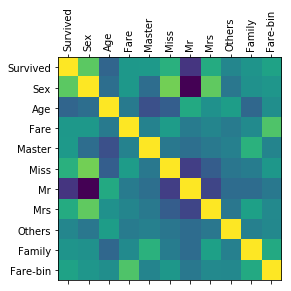

In [15]:
import matplotlib.pyplot as plt

plt.matshow(df_train.corr())
tick_marks = [i for i in range(len(df_train.columns))]
plt.xticks(tick_marks, df_train.columns, rotation='vertical')
plt.yticks(tick_marks, df_train.columns)
plt.show()

In [16]:
df_train.head()

,Survived,Sex,Age,Fare,Master,Miss,Mr,Mrs,Others,Family,Fare-bin
1,1,1,38.0,71.2833,0,0,0,1,0,2,5
3,1,1,35.0,53.1000,0,0,0,1,0,2,5
6,0,0,54.0,51.8625,0,0,1,0,0,1,5
10,1,1,4.0,16.7000,0,1,0,0,0,3,3
11,1,1,58.0,26.5500,0,1,0,0,0,1,4


# Create architecture with TF

In [17]:
import tensorflow as tf

In [18]:
#variables
y_train = df_train['Survived']
x_train = df_train.drop(columns=['Survived'])
feature_vector_length = x_train.shape[1]
feature_vector_length

10

In [37]:
# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = tf.placeholder(tf.float32, shape=(None, feature_vector_length), name='input_x')
y =  tf.placeholder(tf.float32, shape=(None), name='output_y')
is_training = tf.placeholder(tf.float32, name='keep_prob')

In [38]:
epochs = 10
n_batches = 5
batch_size = 128
learning_rate = 0.001

In [39]:
def model_architecture(x, hidden_array, num_classes):
    
    layer_1 = tf.layers.dense(x, hidden_array[0])
    layer_2 = tf.layers.dense(layer_1, hidden_array[1])
    out_layer = tf.layers.dense(layer_2, num_classes)

    return out_layer

In [42]:
logits = model_architecture(x=x, hidden_array=[10,10], num_classes=1)
# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [43]:
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        for batch_i in range(0, n_batches, batch_size):
            feature_batch = x_train[batch_i*batch_size: (batch_i + 1)*batch_size]
            label_batch = y_train[batch_i*batch_size: (batch_i + 1)*batch_size]
            sess.run(optimizer, feed_dict={x: feature_batch, y: label_batch})
                
            print('Epoch {:>2}, Training Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)

InvalidArgumentError: Matrix size-incompatible: In[0]: [128,128], In[1]: [10,1]
	 [[node gradients_1/dense_5/MatMul_grad/MatMul (defined at <ipython-input-42-2a533af4dd10>:4)  = MatMul[T=DT_FLOAT, _class=["loc:@gradients_1/dense_5/MatMul_grad/tuple/control_dependency"], transpose_a=false, transpose_b=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](gradients_1/softmax_cross_entropy_with_logits_sg_1_grad/mul, dense_5/kernel/read, ^gradients_1/dense_5/BiasAdd_grad/BiasAddGrad)]]

Caused by op 'gradients_1/dense_5/MatMul_grad/MatMul', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-42-2a533af4dd10>", line 4, in <module>
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 400, in minimize
    grad_loss=grad_loss)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 519, in compute_gradients
    colocate_gradients_with_ops=colocate_gradients_with_ops)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 630, in gradients
    gate_gradients, aggregation_method, stop_gradients)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 814, in _GradientsHelper
    lambda: grad_fn(op, *out_grads))
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 408, in _MaybeCompile
    return grad_fn()  # Exit early
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 814, in <lambda>
    lambda: grad_fn(op, *out_grads))
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py", line 1130, in _MatMulGrad
    grad_a = gen_math_ops.mat_mul(grad, b, transpose_b=True)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 4560, in mat_mul
    name=name)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

...which was originally created as op 'dense_5/MatMul', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
[elided 25 identical lines from previous traceback]
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-42-2a533af4dd10>", line 1, in <module>
    logits = model_architecture(x=x, hidden_array=[10,10], num_classes=1)
  File "<ipython-input-39-4904a9f3d11c>", line 5, in model_architecture
    out_layer = tf.layers.dense(layer_2, num_classes)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/layers/core.py", line 184, in dense
    return layer.apply(inputs)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py", line 817, in apply
    return self.__call__(inputs, *args, **kwargs)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/layers/base.py", line 374, in __call__
    outputs = super(Layer, self).__call__(inputs, *args, **kwargs)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py", line 757, in __call__
    outputs = self.call(inputs, *args, **kwargs)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/keras/layers/core.py", line 970, in call
    outputs = gen_math_ops.mat_mul(inputs, self.kernel)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 4560, in mat_mul
    name=name)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/home/bea/.virtualenvs/python3.6-keras/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Matrix size-incompatible: In[0]: [128,128], In[1]: [10,1]
	 [[node gradients_1/dense_5/MatMul_grad/MatMul (defined at <ipython-input-42-2a533af4dd10>:4)  = MatMul[T=DT_FLOAT, _class=["loc:@gradients_1/dense_5/MatMul_grad/tuple/control_dependency"], transpose_a=false, transpose_b=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](gradients_1/softmax_cross_entropy_with_logits_sg_1_grad/mul, dense_5/kernel/read, ^gradients_1/dense_5/BiasAdd_grad/BiasAddGrad)]]


# Unit test conv

In [ ]:
def make_convnet(input_image):
    net = slim.conv2d(input_image, 32, [11, 11], scope="conv1_11x11")
    net = slim.conv2d(input_image, 64, [5, 5], scope="conv2_5x5")
    net = slim.max_pool2d(net, [4, 4], stride=4, scope='pool1')
    net = slim.conv2d(input_image, 64, [5, 5], scope="conv3_5x5")
    net = slim.conv2d(input_image, 128, [3, 3], scope="conv4_3x3")
    net = slim.max_pool2d(net, [2, 2], scope='pool2')
    net = slim.conv2d(input_image, 128, [3, 3], scope="conv5_3x3")
    net = slim.max_pool2d(net, [2, 2], scope='pool3')
    net = slim.conv2d(input_image, 32, [1, 1], scope="conv6_1x1")
    return net

In [ ]:
def test_convnet():
  image = tf.placeholder(tf.float32, (None, 100, 100, 3)
  model = Model(image)
  sess = tf.Session()
  sess.run(tf.global_variables_initializer())
  before = sess.run(tf.trainable_variables())
  _ = sess.run(model.train, feed_dict={
               image: np.ones((1, 100, 100, 3)),
               })
  after = sess.run(tf.trainable_variables())
  for b, a, n in zip(before, after):
      # Make sure something changed.
      assert (b != a).any()